## Evaluating Regression Models

### What
- Since models are approximations of reality, we're measuring how closely our linear models approximate reality.
- With evaluating regression models, we'll calculate this closeness by measuring the error, which is the distance between the regression line (prediction) and actual data points.

### Why

Techniques in this lesson answer the following questions:
- How do we know if our model is good enough?
- How do we evaluate our model?
- Is our model valuable?
- Are our features valuable?

### How - what is our approach?
Prerequisites
- Establish a baseline (often the average of the target)
- Build a super simple model (or isolate the model we're evaluating)
- Calculate baseline and model residuals

Evaluate the model
- Calculate SSE, MSE, and RMSE (Root Mean Squared Error)
- Determine if the model is significant
- Determine if the features are significant

### When do we evaluate a model?
- As soon as we've got a super basic model, it's important to know if it beats baseline.
- If so, we'll keep on modeling, making new models, tuning, etc...
- If not, maybe a different model or different feature(s) will help.

### Vocabulary
- Baseline is often the mean, but could also be the median or "last year's" model, in practice.
- Line of best fit = regression line == linear model that best fits the data points.
- Residuals: for each data point, the vertical distance between each predicted $\hat{y}$ and actual $y$ values.. - This is $\hat{y} - y$
- Linear model = a line that best approximates reality.
- $y = mx + b$ is a linear model
- SSE = sum of squared errors
- MSE = mean squared error
- RMSE = root mean squared error = sqrt(MSE)
- Taking the square root means we get same units as y

In [2]:
# imports 
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

from statsmodels.formula.api import ols

In [3]:
# acquiring sales data from url
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")

# creating new column that holds log rainfall value
df["log_rainfall"] = np.log(df.rainfall)

df.head()

,temperature,rainfall,flyers,sales,log_rainfall
0,27.0,2.00,15,10,0.693147
1,28.9,1.33,15,13,0.285179
2,34.5,1.33,27,15,0.285179
3,44.1,1.05,28,17,0.048790
4,42.4,1.00,33,18,0.000000


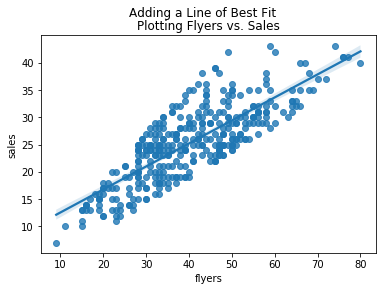

In [4]:
# creating regplot of flyers vs. sales including line of best fit aka regression line
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Flyers vs. Sales")

sns.regplot(x="flyers", y="sales", data=df)
plt.show()

### Okay, so .regplot can add a line of best fit
- But is this model any good?
- Is it better than a baseline?
- How do we get a baseline?
- And is this this model significant?
- What does it mean that the points are spread out from the line?
- What does it mean if they're close to the line?

### The Evaluation Playbook is here to help!
Prerequisites:
- Establish a baseline
- Produce a super simple model
- Calculate the model and baseline residuals

Evaluation:
- Calculate evaluation metrics from residuals
- Determine if the model is significant
- Determine if the features are significant (we'll do this later)

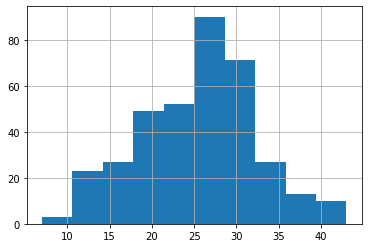

In [5]:
# creating historgram of sales
df.sales.hist()

In [6]:
# Pre-requisite Part 1 - establish a baseline. 
# sales are normally distrbuted so we can use the mean as our baseline
# if there were several outliers we may consider median since a median value is less 
# sensitive to outliers
baseline = df.sales.mean()

In [7]:
# Pre-requisite Part 2 - build simple linear model

# importing ordinary least squares
from statsmodels.formula.api import ols

# creating ols model and fitting to sales and flyers data
model = ols('sales ~ flyers', df).fit()

In [8]:
# Pre-requisite Part 3 - Calculate residuals

# creating empty df
evaluate = pd.DataFrame()

# feature = x = flyers
evaluate["x"] = df.flyers

# target variable = y = sales
evaluate["y"] = df.sales

# creating baseline column of mean sales value
evaluate["baseline"] = df.sales.mean()

# creating yhat column that holds model predictions for sales
evaluate["yhat"] = model.predict()

#  baseline residuals 
evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

# Calculate the model residuals
evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head(4)

,x,y,baseline,yhat,baseline_residual,model_residual
0,15,10,25.323288,14.673754,15.323288,4.673754
1,15,13,25.323288,14.673754,12.323288,1.673754
2,27,15,25.323288,19.727926,10.323288,4.727926
3,28,17,25.323288,20.149107,8.323288,3.149107
